### try to bring in some other data source, 


Love the PewDiePie correlation! My children are using this against me
though. ;-(

1.2 Good catch on “All” state. You are one of the few who has made that observation.

3.1 Nice attempt to annotate the charts. That helps a lot.

4.3 stats.percentileofscore is going to return a number between 0 and
100: it is essentially equivalent to Rank. So your box plots will look
exactly the same for all variables as it hides anything to do with the
underlying distribution.

7 Good idea to visualize drug use by age.

7.2 It doesn't really make any difference. Even with a thousand
columns in your dataset both of those will complete in milliseconds.


As for your question at the end about the obesity data...
sat_obesity.iloc[:,-4:-1] is going to give you the last 4 columns.
So the first time through the for loop,  col will be the last 4
columns of the first row of sat_obesity.

This isn't an index of drugs, so it raises a KeyError.

I think what you want to do is use pandas.merge to create one big
dataframe from your drugs and obesity data.

Appreciate your effort on putting up nice charts. It would have been great if you could add few explanations/insights on the chart. This will help audiences to understand clearly what you are trying to convey.

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'
sns.set_style('ticks')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
sat = pd.read_csv('sat_scores.csv').to_dict(orient='list')


In [5]:
sat

{'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
#  Is this redundant because I didn't use the csv reader option?
sat_from_dict = pd.DataFrame(sat)
sat_from_dict.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

In [7]:
sat_scores = pd.read_csv('sat_scores.csv')
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
sat_scores

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
# Removing Row All (Index 51).

# sat_scores = sat_scores[sat_scores.State != 'All'].copy()
# copy() makes a new df.

# drop would have been more efficient.

sat_scores.drop(sat_scores.index[-1], inplace = True)

In [10]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [11]:
sat_scores

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [12]:
sat_scores.head(10)

#  From the first ten rows we can see that we have:
#  Col 1 : Categorical data for the States in the US.
#  Col 2 - 4 : Integer values covering Rate, Verbal & Math scores.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [13]:
sat_scores[0:10]

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
data_dictionary = {
    'State' : "US State as two letter abbreviation",
    'Rate' : "% of graduating high school students taking the SAT",
    'Verbal' : "Average Verbal score of State",
    'Math': "Average Math score of State",
    'Shape' : sat_scores.shape
}
data_dictionary


{'Math': 'Average Math score of State',
 'Rate': '% of graduating high school students taking the SAT',
 'Shape': (51, 4),
 'State': 'US State as two letter abbreviation',
 'Verbal': 'Average Verbal score of State'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

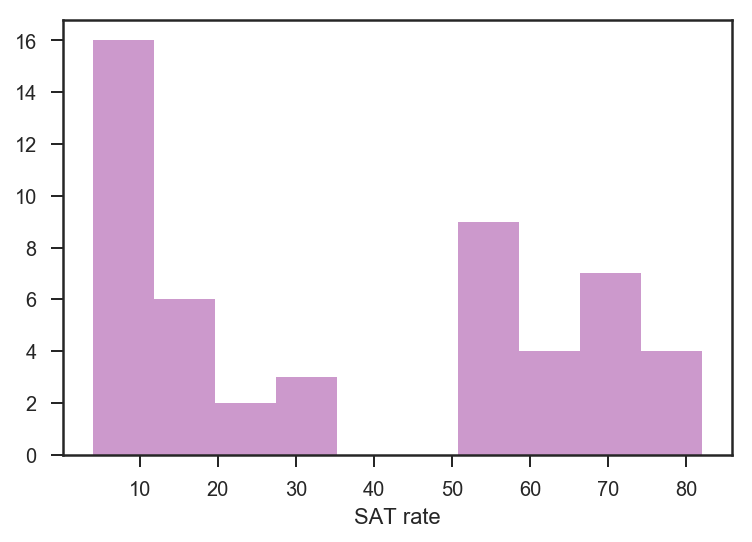

In [15]:
sns.distplot(sat_scores.Rate, bins=10, kde=False , color='purple', axlabel="SAT rate")

# Question:  is there a rule of thumb for the number of bins to use?


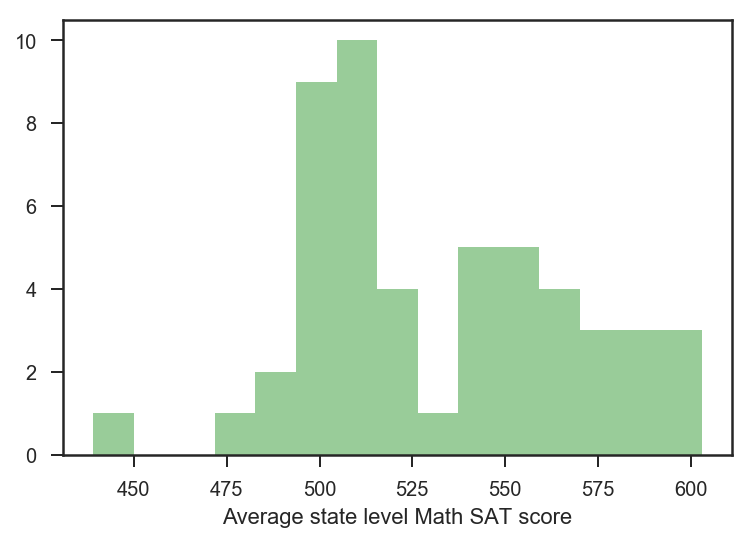

In [16]:
sns.distplot(sat_scores.Math, bins=15, kde=False , color='green', axlabel="Average state level Math SAT score")

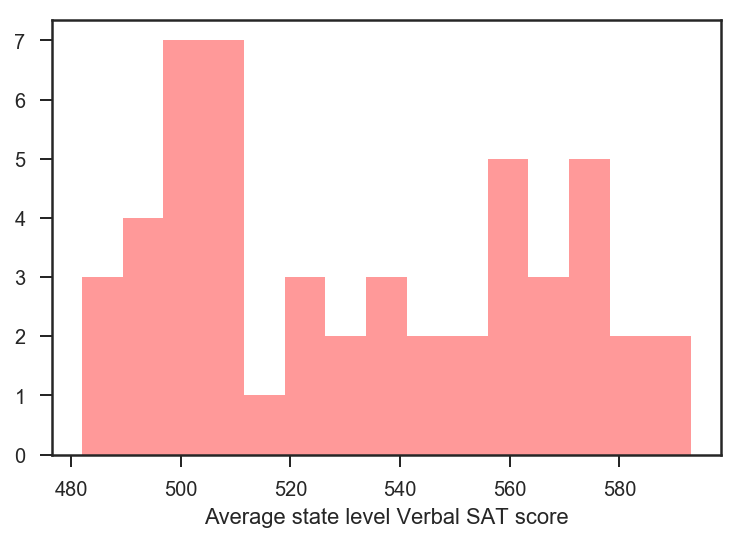

In [17]:
sns.distplot(sat_scores.Verbal, bins=15, kde=False , color='red', axlabel="Average state level Verbal SAT score")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

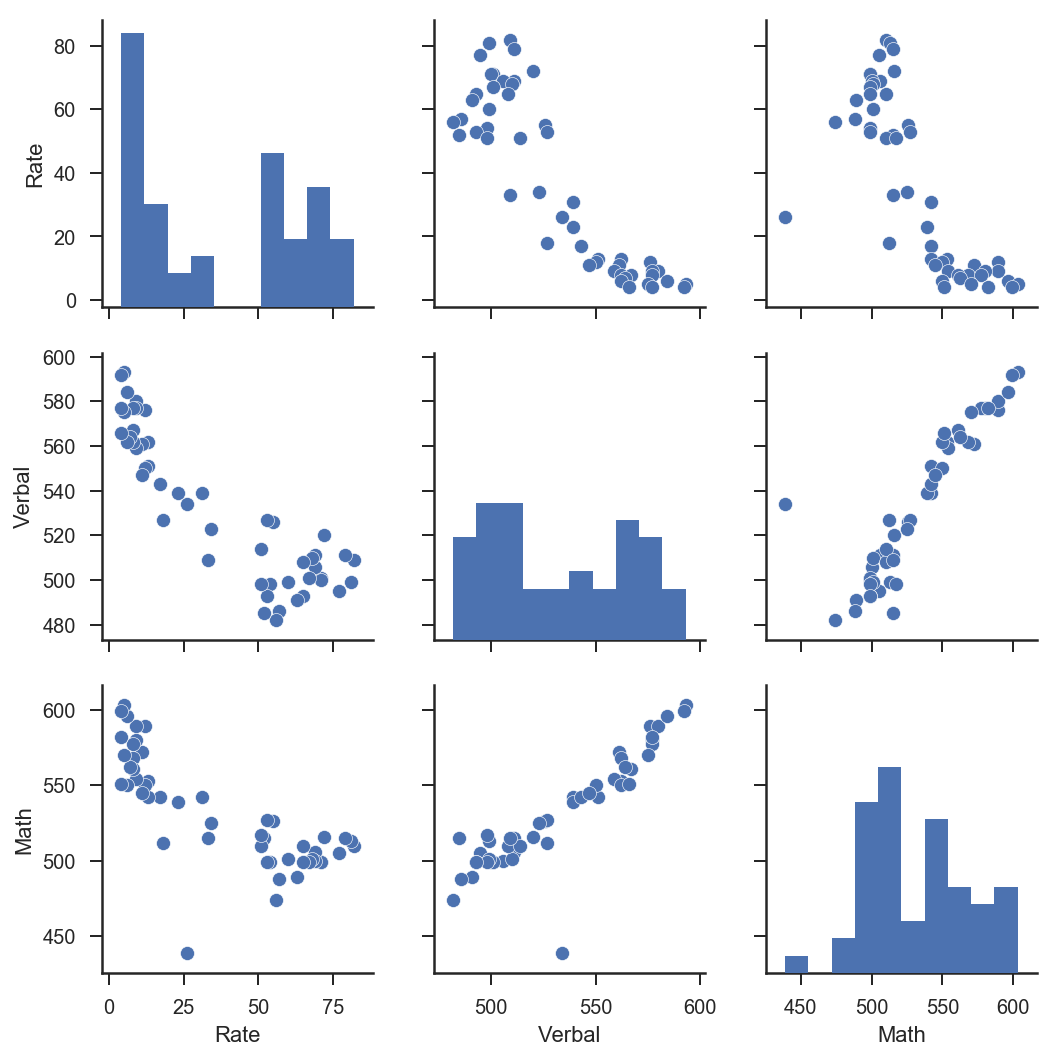

In [18]:
sns.pairplot(sat_scores)

# Rate appears to have a negative correlation with Verbal & Math scores.
# ie. Higher State Rate, lower State Verbal & Math score.

# Verbal & Math are positively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

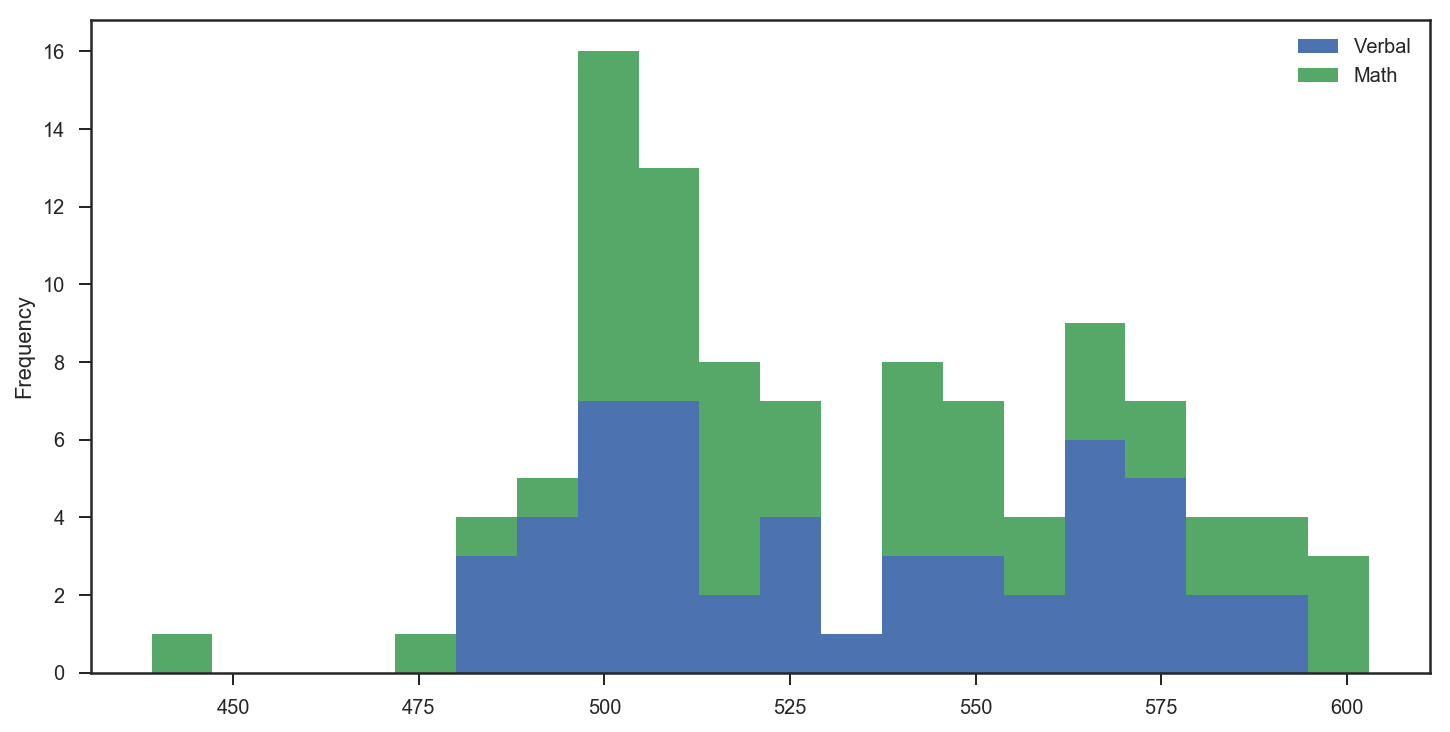

In [225]:
sat_scores[['Verbal', 'Math']].plot.hist(stacked=True, figsize = (12,6), bins = 20)


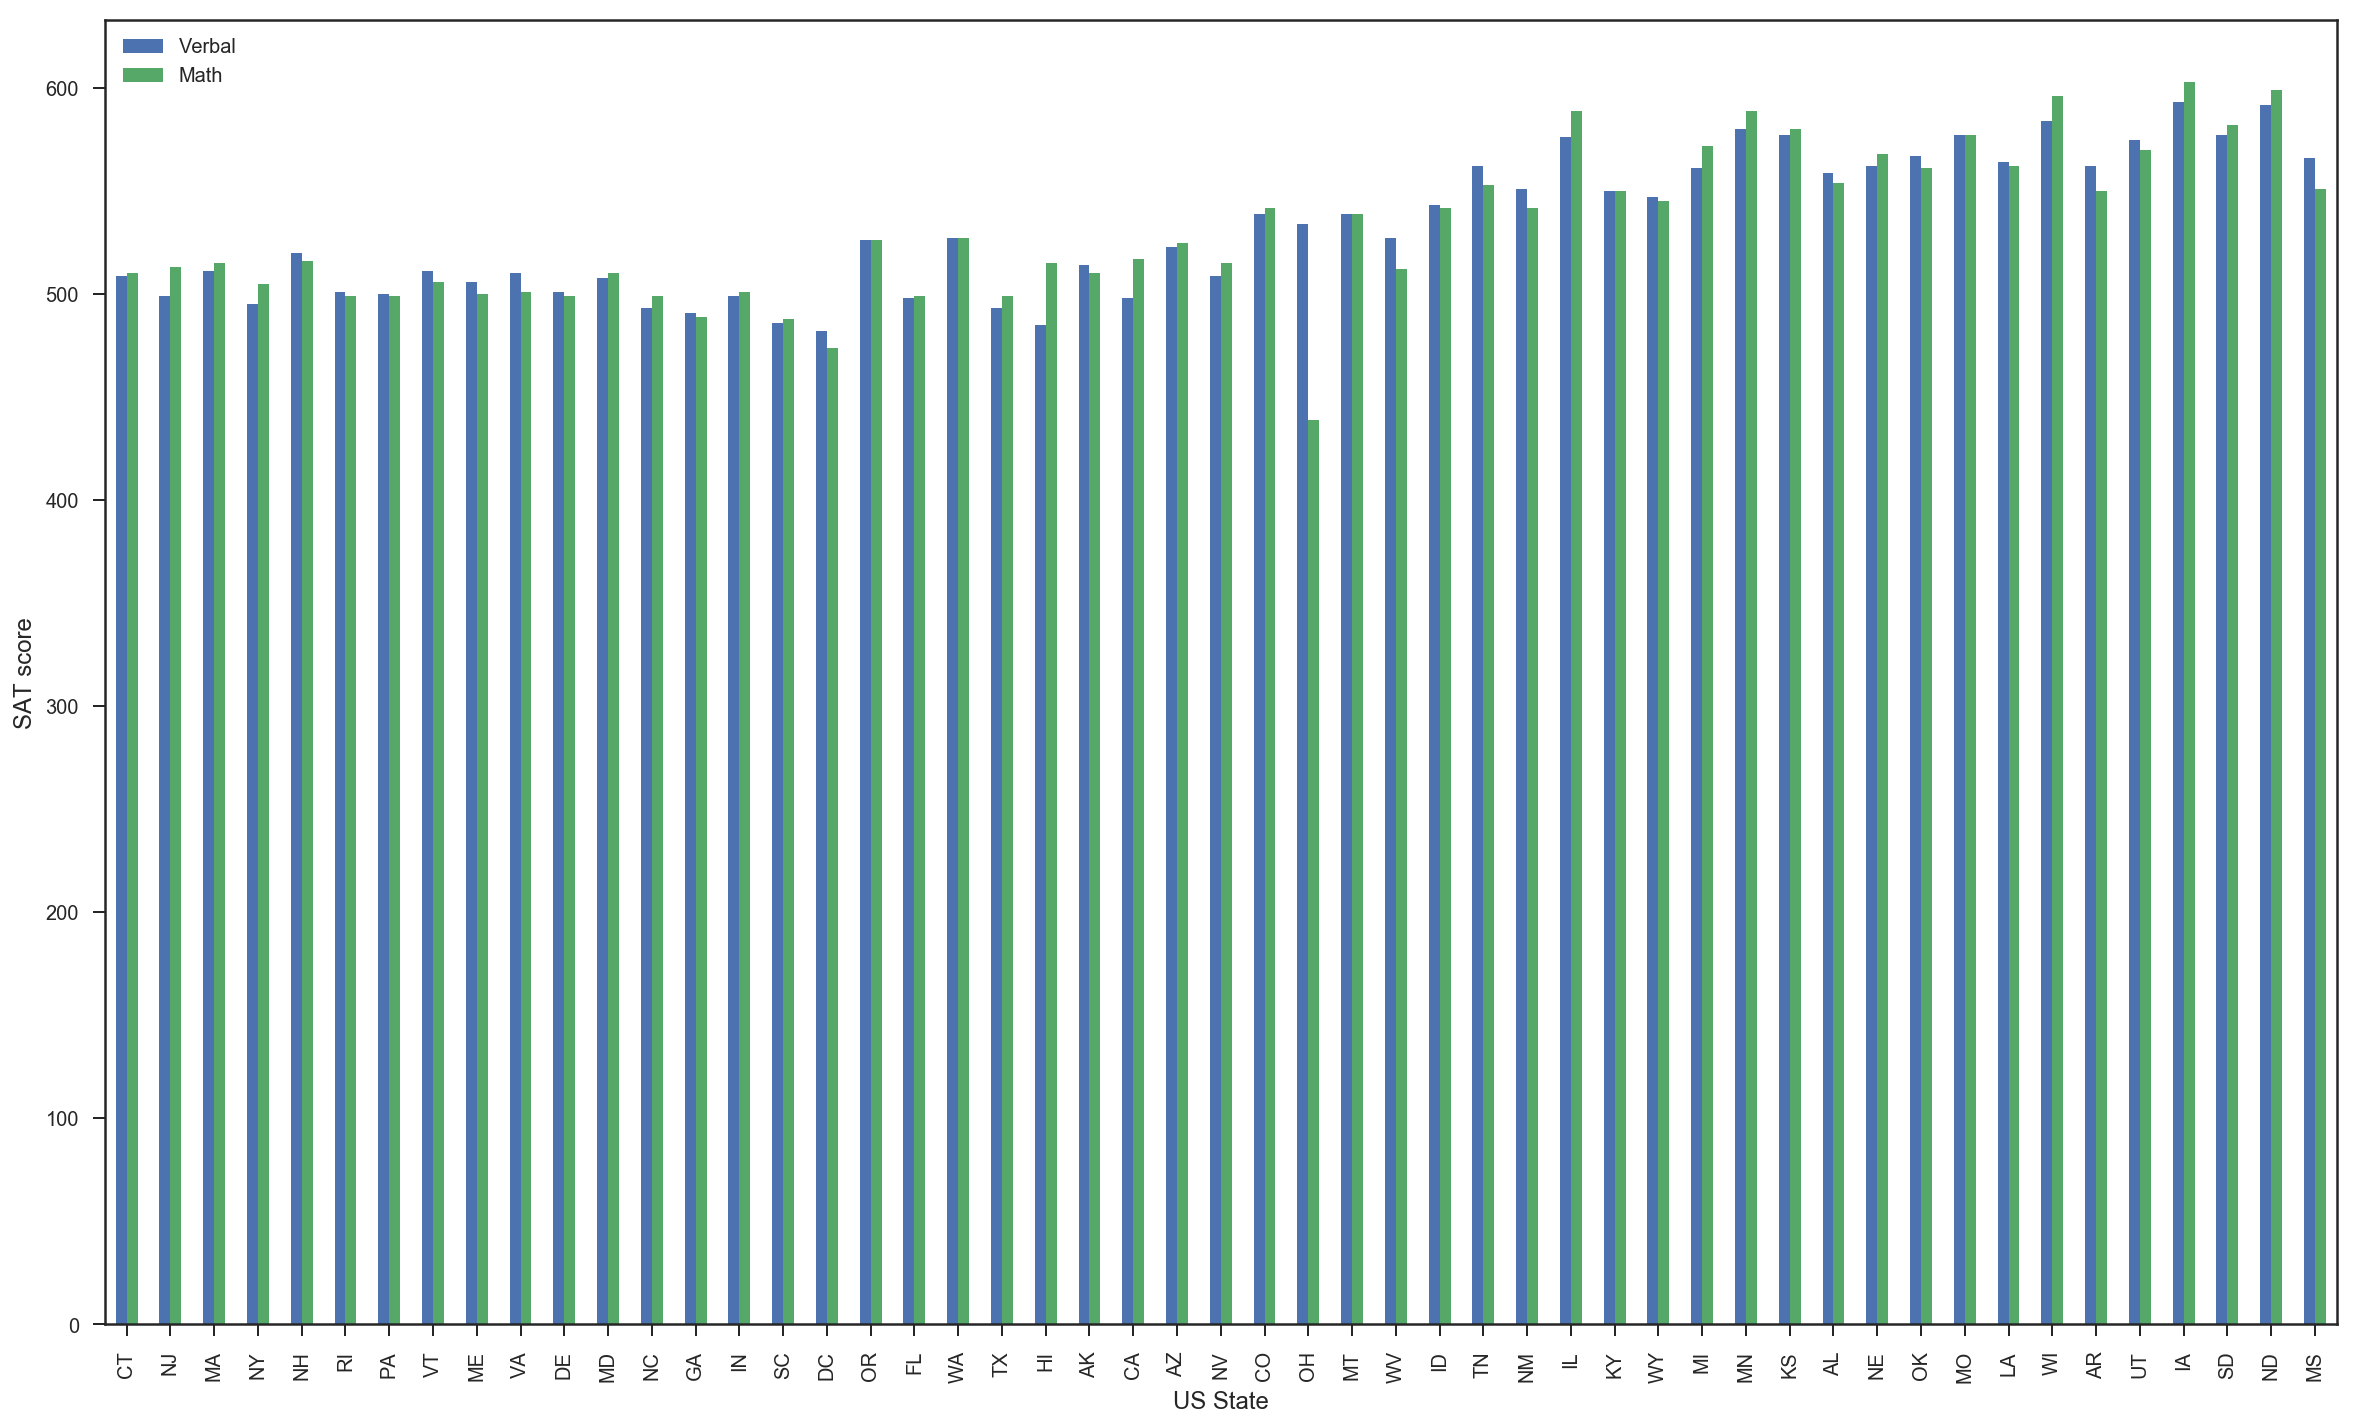

In [20]:
# testing bar plot
stacked = sat_scores[['Verbal', 'Math']].plot.bar(figsize = (20,12))
stacked.set_xlabel('US State', fontsize = 12)
stacked.set_ylabel('SAT score', fontsize = 12)
stacked.set_xticklabels(sat_scores.State);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [21]:
# Box plots allows for easy comparison of range/quartile spreads across two + measures.
# Also, provides indication of symmetry and skewness.

# There is wide gap in the range of the SAT scores and Rates, making side by side comparison less appropriate.


/Users/James/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


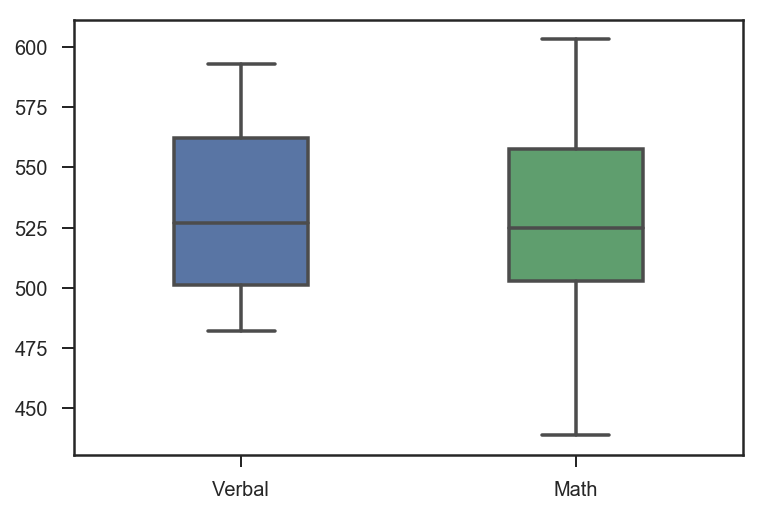

In [22]:
sns.boxplot(sat_scores[['Verbal', 'Math']], width = 0.4)

# Should I be concerned about the below message re. "UserWarning: The boxplot API has been changed..."?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [217]:
# I'm assuming making an index of all the scores into a df. then plot that ?

# sat_scores[['Rate','Verbal', 'Math']].boxplot()

Math_Percentile = []
for i in sat_scores.Math:
    Math_Percentile.append(stats.percentileofscore(sat_scores.Math, i))

Verbal_Percentile = []
for i in sat_scores.Verbal:
    Verbal_Percentile.append(stats.percentileofscore(sat_scores.Verbal, i))

Rate_Percentile = []
for i in sat_scores.Rate:
    Rate_Percentile.append(stats.percentileofscore(sat_scores.Rate, i))
    


In [222]:
sat_scores_percentiles = sat_scores

sat_scores_percentiles['Math_Percentile'] = Math_Percentile
sat_scores_percentiles['Verbal_Percentile'] = Verbal_Percentile
sat_scores_percentiles['Rate_Percentile'] = Rate_Percentile

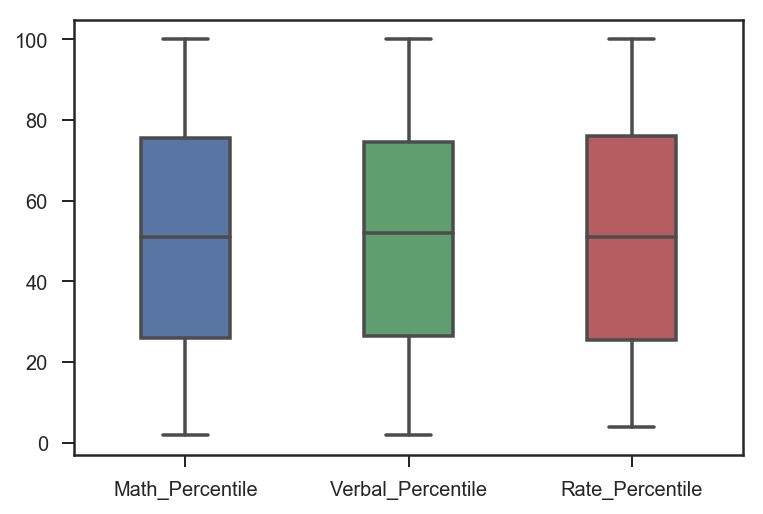

In [223]:
sns.boxplot(sat_scores_percentiles[['Math_Percentile', 'Verbal_Percentile', 'Rate_Percentile']], width = 0.4)

In [ ]:
# Converting to percentiles makes the max value of the boxplot constant across all variables.
# As a measure of distribution within variables, this shows that these are 
# relatively consistent (assuming I haven't missed something here)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [24]:
print str(sat_scores.State[sat_scores.Verbal > 
                           sat_scores.Verbal.mean()].nunique()) + "  States above average Verbal scores"
sat_scores.State[sat_scores.Verbal > sat_scores.Verbal.mean()]

# Suggests potential positive skew in distrubtion as the median Verbal score is below mean (assuming normal dist.)

24  States above average Verbal scores


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
sat_scores.State[sat_scores.Verbal > sat_scores.Verbal.mean()].unique()

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [26]:
sat_scores.State[sat_scores.Verbal > sat_scores.Verbal.median()].unique()

# The two lists are the same, suggests Verbal & Math scores are positively correlated and
# States that do well in one, also do so in the other.


array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [27]:
sat_scores['Diff_Verbal_Math'] = (sat_scores['Verbal'] - sat_scores['Math'])

In [28]:
sat_scores.head()

,State,Rate,Verbal,Math,Diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [29]:
# Verbal greater than Math
Verbal_Gap = sat_scores.sort_values(['Diff_Verbal_Math'], ascending = False).head(10)
Verbal_Gap

,State,Rate,Verbal,Math,Diff_Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [30]:
# Math is greater than Verbal
Math_Gap = sat_scores.sort_values(['Diff_Verbal_Math'], ascending = True).head(10)
Math_Gap

,State,Rate,Verbal,Math,Diff_Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [31]:
sat_scores.corr()

# Math & Verbal are strongly positively correlated.
# Rate is negatively correlated with both Math & Verbal scores.


,Rate,Verbal,Math,Diff_Verbal_Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Diff_Verbal_Math,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
sat_scores.describe()

# count, there are 51 rows for Rate, Verbal and Math
# mean, Rate - 37% state average for grad. HS students to take the SAT.
#       Across all states, Verbal and Math means 532.5 and 531.8 respectively
# std, std deviation is higher for Math than Verbal, indicating Math has a wider range.
# min, lowest value for each column.
# 25%, 50%, 75% - lower quartile, median, upper quartile ranges for each.
# max, max value for each column.
# latter rows confirm that Math has a wider range of values vs. Verbal scores across states.



,Rate,Verbal,Math,Diff_Verbal_Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [33]:
sat_scores.cov()

,Rate,Verbal,Math,Diff_Verbal_Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Diff_Verbal_Math,-43.06,23.529412,-227.370196,250.899608


In [34]:
# 1. Both look to measure the extend two which two variables changes in relation to one another.
#   Covariance measures are unstandardised whereas correlation is a function of
#   covariance and standardised to a value between -1 and 1.

# 2. Correlation coefficient = covariance of x and y / std dev of x * std dev of y.


# 3. Correlation coefficients are standardised to fall between -1 and 1.  
#    This allows for assessment of the directional relationship of two variables as a result.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [35]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [36]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [37]:
drugs.loc[:, drugs.dtypes == object]

# drugs.select_dtypes(include=[object])
# in the search of efficiency, which of the above would be preferable?

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0


In [38]:
for colname in drugs.select_dtypes(include=[object]).drop('age', axis=1):
    ''' replaces '-' with 0 value, excludes column 'age' as '-' is still appropriate, convert to float type'''
    drugs[colname].replace('-', 0, inplace = True)
    drugs[colname] = drugs[colname].astype(float)

In [39]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

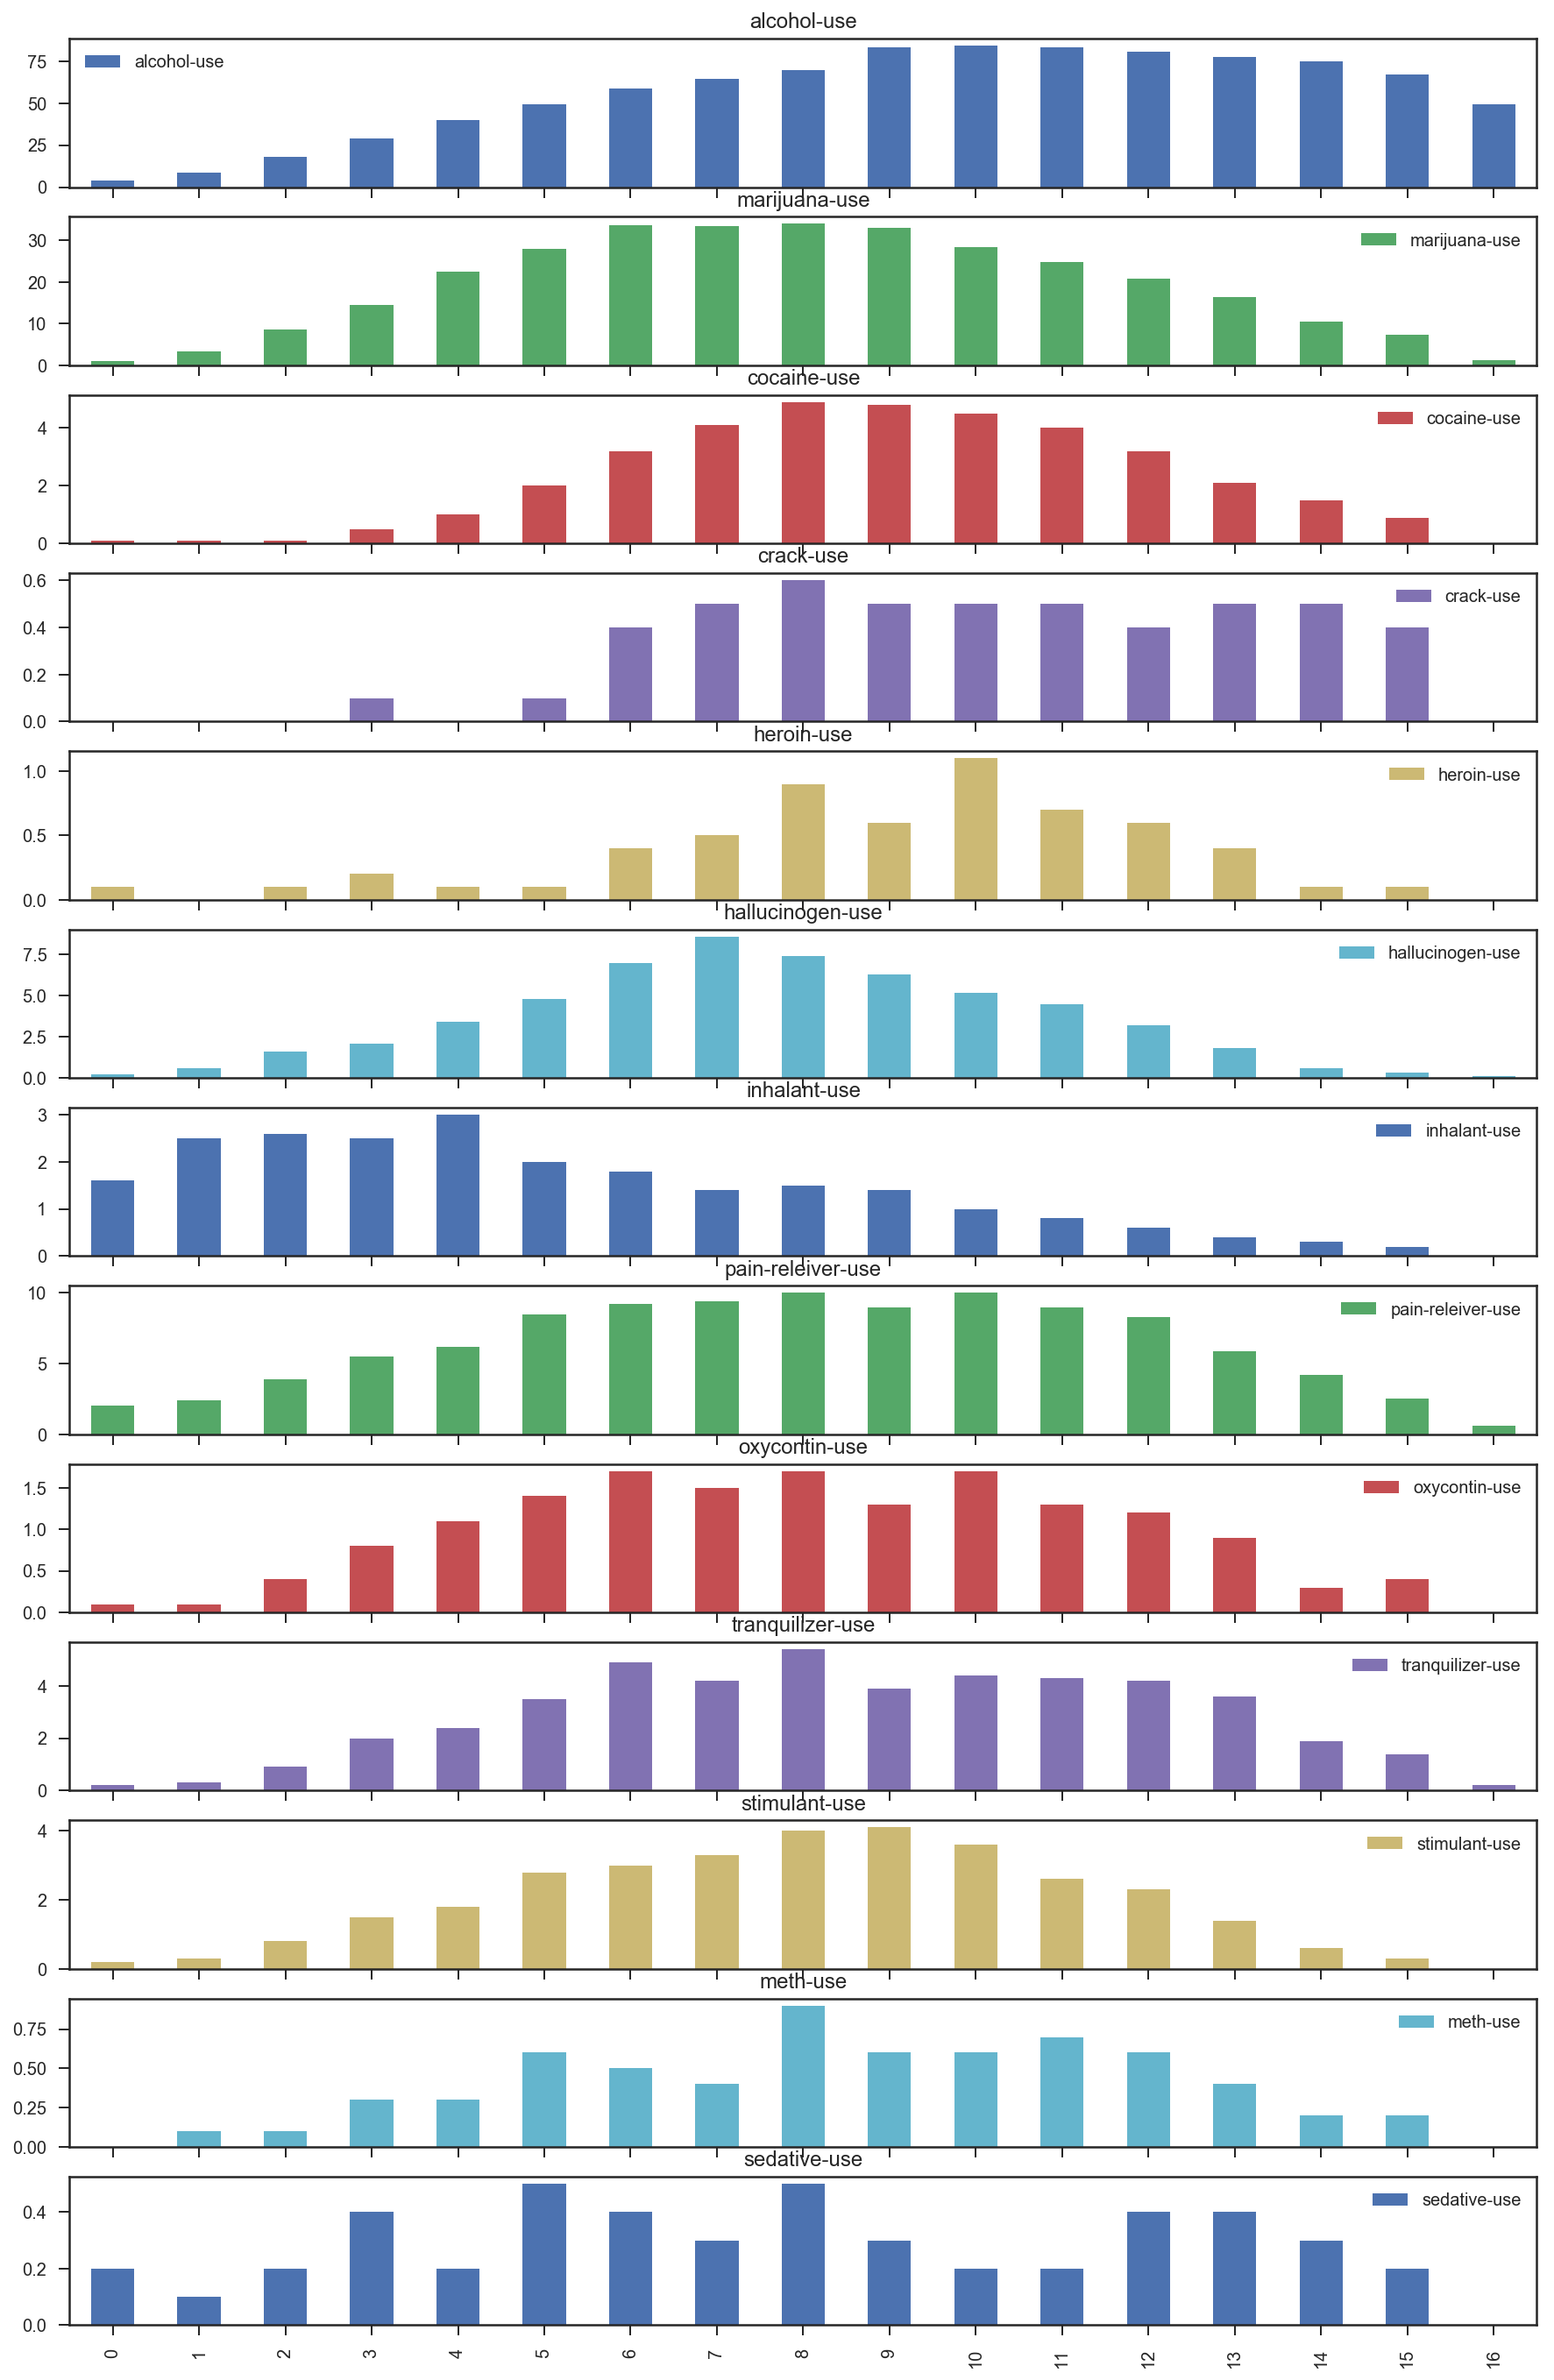

In [296]:
d = drugs.loc[:, drugs.keys().str.contains('use')].plot(subplots=True, kind='bar', figsize=(15,24));



In [41]:
drugs.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.388318,0.281797,0.574629,0.007798,...,-0.166039,0.021226,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.510735,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,...,0.589219,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,...,0.251554,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,...,0.971733,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,...,0.609618,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,...,0.865626,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997
cocaine-frequency,0.388318,0.260301,0.317172,-0.154879,0.265193,-0.077848,1.000000,0.307329,0.872260,-0.127827,...,-0.152548,-0.154491,-0.080911,-0.103142,-0.230324,-0.183692,-0.080921,0.240660,0.021109,0.761572
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.307329,1.000000,0.333440,0.750790,...,0.603003,0.140619,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.404741,0.438421,0.091676
crack-frequency,0.574629,0.337802,0.364267,-0.143323,0.273167,-0.076876,0.872260,0.333440,1.000000,-0.217811,...,-0.187504,-0.115546,-0.080356,-0.215342,-0.219458,-0.125405,-0.070355,0.346559,0.129511,0.602101
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.127827,0.750790,-0.217811,1.000000,...,0.775321,0.112525,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.058656,0.333649,-0.023708


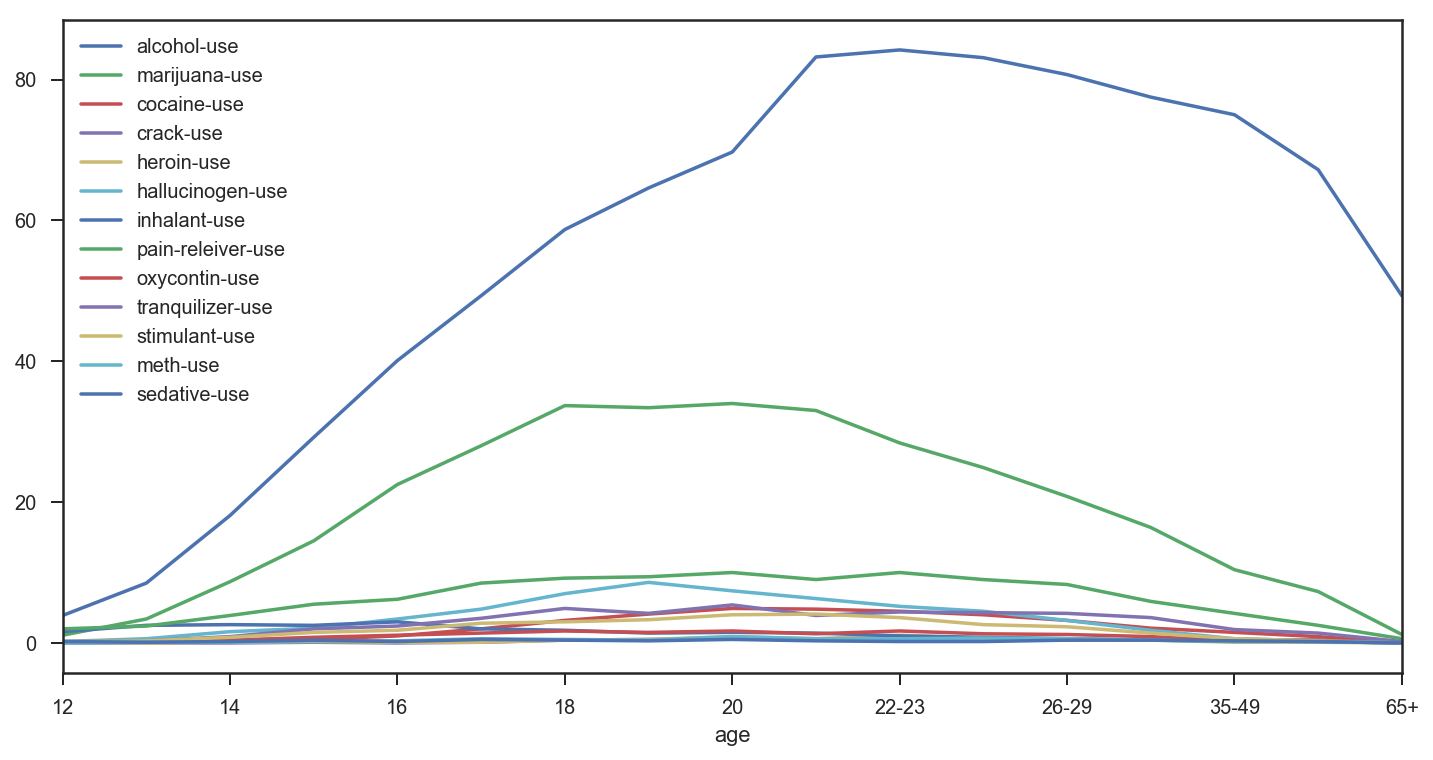

In [281]:
d = drugs.loc[:, drugs.keys().str.contains('use')]
d.set_index(drugs.age, inplace = True)
d.plot(figsize=(12,6))

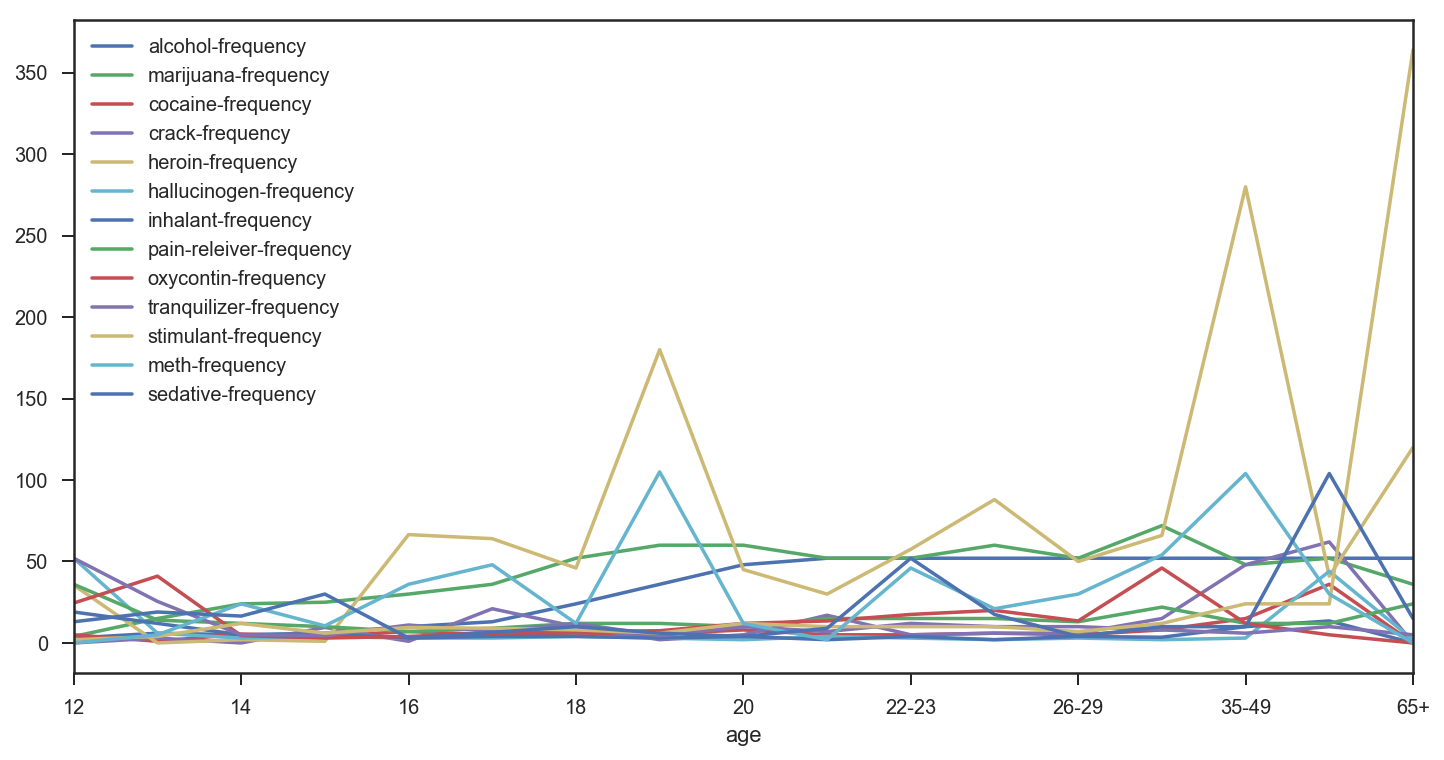

In [282]:
d = drugs.loc[:, drugs.keys().str.contains('frequency')]
d.set_index(drugs.age, inplace = True)
d.plot(figsize=(12,6))

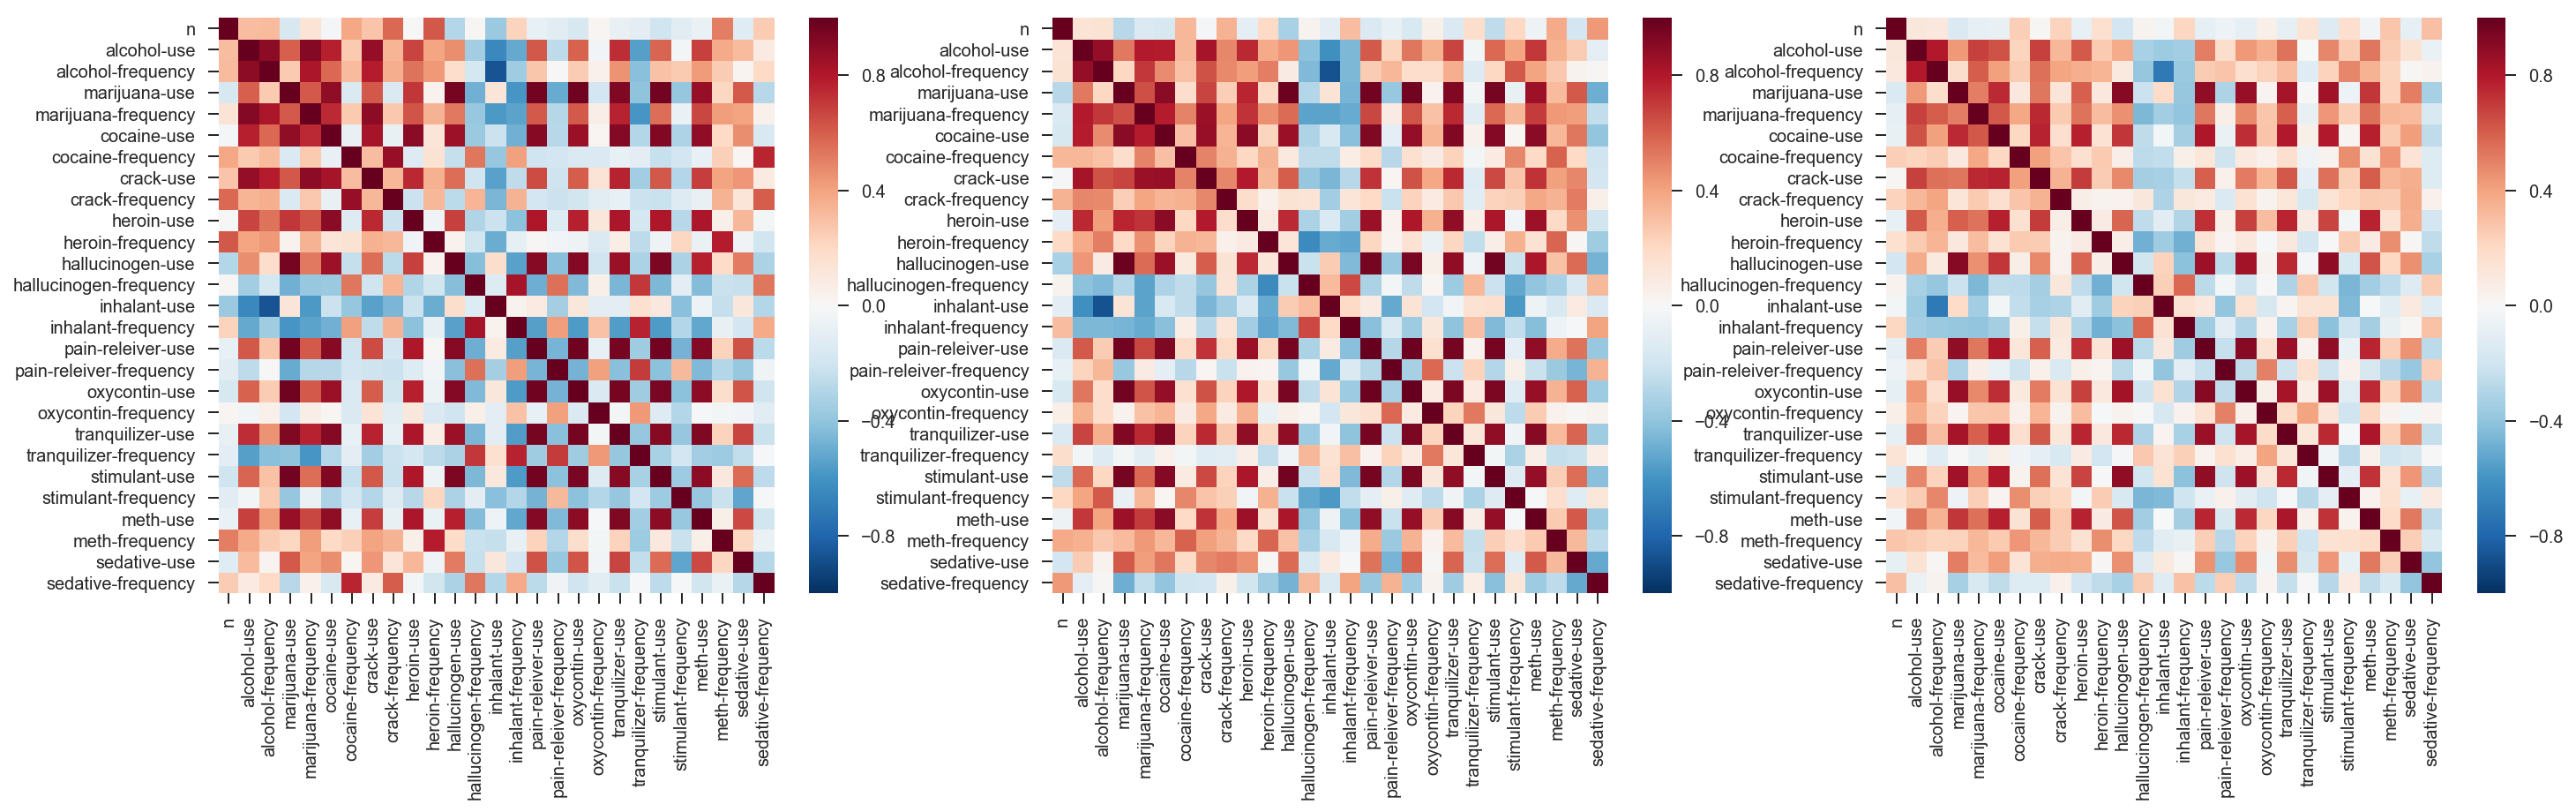

In [43]:
(fig, axes) = plt.subplots(ncols = 3)
fig.set_size_inches(24,6)
sns.heatmap(drugs.corr(), ax=axes[0])
sns.heatmap(drugs.corr('spearman'), ax=axes[1])
sns.heatmap(drugs.corr('kendall'), ax=axes[2])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [44]:
# Hypothesis Frequency of Crack usage is highly correlated to the frequency of Cocaine usage.  
# Yes, I know this is boring as crack is a form of cocaine and is very likely to have an association.

print stats.pearsonr(drugs['crack-frequency'], drugs['cocaine-frequency'])

(0.87225997641161046, 4.9944393748632137e-06)


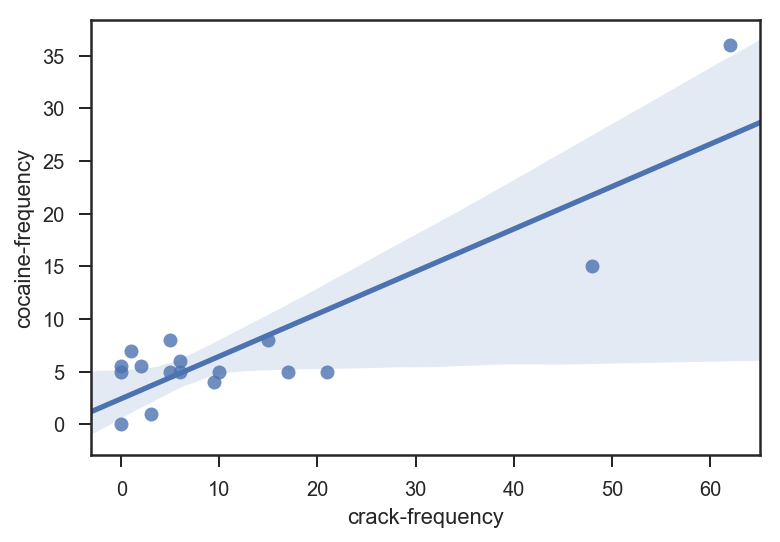

In [45]:
sns.regplot(x='crack-frequency', y='cocaine-frequency', data=drugs)

**Report**

Correlation Coefficient = 0.87, indicating strong positive relationship between the two variables
p-value = 4.99e-06 showing statistical signficances in the result

Frequency of cocaine and crack usage are strongly inter-related, though relationship loses predictive value
as consumption frequency increases to more extreme values based on this data set.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [46]:
print 'Pearson Correlation'
print sat_scores[['Verbal','Math']].corr()
print ''
print 'Spearman Correlation'
print sat_scores[['Verbal','Math']].corr(method='spearman')

# Spearman Rank Correlation and is computed on ranked values for variables and better depicts monotonic relationships.
# Monotonic relationship where variables change together but not necessarily at a constant rate.

# Whereas Pearson Correlation is computed is on true values better depicts linear relationships.

# Doing both can show if correlations are monotic but not linear (where Spearman > Pearson) and vice versa.


Pearson Correlation
          Verbal      Math
Verbal  1.000000  0.899909
Math    0.899909  1.000000

Spearman Correlation
          Verbal      Math
Verbal  1.000000  0.909413
Math    0.909413  1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [47]:
Rates_Percentile = []
for i in sat_scores.Rate:
    Rates_Percentile.append(stats.percentileofscore(sat_scores.Rate, i))

In [48]:
sat_scores['Rates_Percentile'] = Rates_Percentile

In [49]:
sat_scores

,State,Rate,Verbal,Math,Diff_Verbal_Math,Rates_Percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863
5,RI,71,501,499,2,89.215686
6,PA,71,500,499,1,89.215686
7,VT,69,511,506,5,85.294118
8,ME,69,506,500,6,85.294118
9,VA,68,510,501,9,82.352941


In [50]:
print "Percentile of California: " + str(
    stats.percentileofscore(sat_scores.Rate, (int(sat_scores.Rate[sat_scores.State == "CA"]))).round(2)) +"%"

Percentile of California: 55.88%


In [51]:
print "California SAT Rate is in the " + str(round(
    float(sat_scores.Rates_Percentile[sat_scores.State == "CA"]))) + " percentile"


California SAT Rate is in the 56.0 percentile


In [52]:
#  How is percentile related to the spearman rank correlation?

# Converting to percentiles is a normalisation process maintain the relative rank of variables.
# Spearman's coefficient converts raw data is into ranked data as first part of the calculation.


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [53]:
# Percentiles can be used in dealing with outliers as they can be used as a non arbitrary cut off for trimming
# i.e. cut off values on the upper & lower 10%.
# Percentiles are also used as part of windsoring to correct outliers if desired.

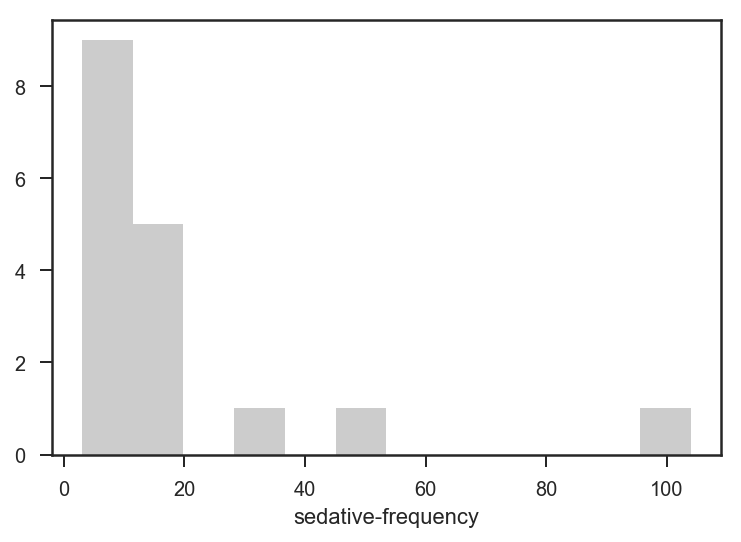

In [54]:
sns.distplot(drugs['sedative-frequency'],bins=12 , kde=False , color='gray')

In [55]:
Sedative_Percentile = []
for i in drugs['sedative-frequency']:
    Sedative_Percentile.append(stats.percentileofscore(drugs['sedative-frequency'], i))

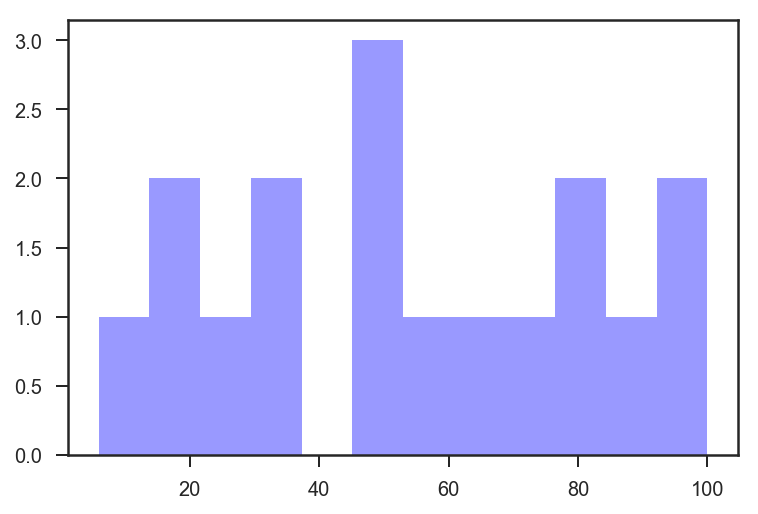

In [56]:
sns.distplot(Sedative_Percentile, bins=12, kde=False , color='blue')

In [57]:
# Percentiles provide greater insight to the distribution of values.
# Particularly smoothing out the cluster of values < 20.

### Additional Data Set


In [58]:
youtube = pd.read_csv('geoMap.csv', header=1)
youtube.columns = ['Region', 'PewDiePie', "CrashCourse"]

In [59]:
youtube

,Region,PewDiePie,CrashCourse
0,Alaska,100,33
1,Iowa,82,27
2,Indiana,80,30
3,Maine,79,34
4,New Hampshire,78,35
5,Vermont,76,45
6,Arkansas,76,32
7,Kentucky,76,26
8,North Dakota,75,22
9,West Virginia,74,19


In [60]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KxY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [61]:
youtube['State'] = youtube['Region'].map(us_state_abbrev)

In [62]:
youtube

,Region,PewDiePie,CrashCourse,State
0,Alaska,100,33,AK
1,Iowa,82,27,IA
2,Indiana,80,30,IN
3,Maine,79,34,ME
4,New Hampshire,78,35,NH
5,Vermont,76,45,VT
6,Arkansas,76,32,AR
7,Kentucky,76,26,KY
8,North Dakota,75,22,ND
9,West Virginia,74,19,WV


In [66]:
sat_youtube = sat_scores.merge(youtube, left_on='State',right_on='State', how='left')

#A.merge(B, left_on='lkey', right_on='rkey', how='outer')

In [273]:
 sat_youtube

,State,Rate,Verbal,Math,Diff_Verbal_Math,Rates_Percentile,Region,PewDiePie,CrashCourse
0,CT,82,509,510,-1,100.000000,Connecticut,68.0,37.0
1,NJ,81,499,513,-14,98.039216,New Jersey,70.0,34.0
2,MA,79,511,515,-4,96.078431,Massachusetts,64.0,33.0
3,NY,77,495,505,-10,94.117647,New York,58.0,26.0
4,NH,72,520,516,4,92.156863,New Hampshire,78.0,35.0
5,RI,71,501,499,2,89.215686,Rhode Island,69.0,31.0
6,PA,71,500,499,1,89.215686,Pennsylvania,67.0,25.0
7,VT,69,511,506,5,85.294118,Vermont,76.0,45.0
8,ME,69,506,500,6,85.294118,Maine,79.0,34.0
9,VA,68,510,501,9,82.352941,Virginia,65.0,33.0


In [275]:
sat_youtube = sat_youtube.dropna()





In [276]:
sat_youtube[['PewDiePie', 'CrashCourse', 'Verbal','Math']].corr()

,PewDiePie,CrashCourse,Verbal,Math
PewDiePie,1.000000,0.213916,0.086666,0.068280
CrashCourse,0.213916,1.000000,-0.338595,-0.295194
Verbal,0.086666,-0.338595,1.000000,0.894788
Math,0.068280,-0.295194,0.894788,1.000000


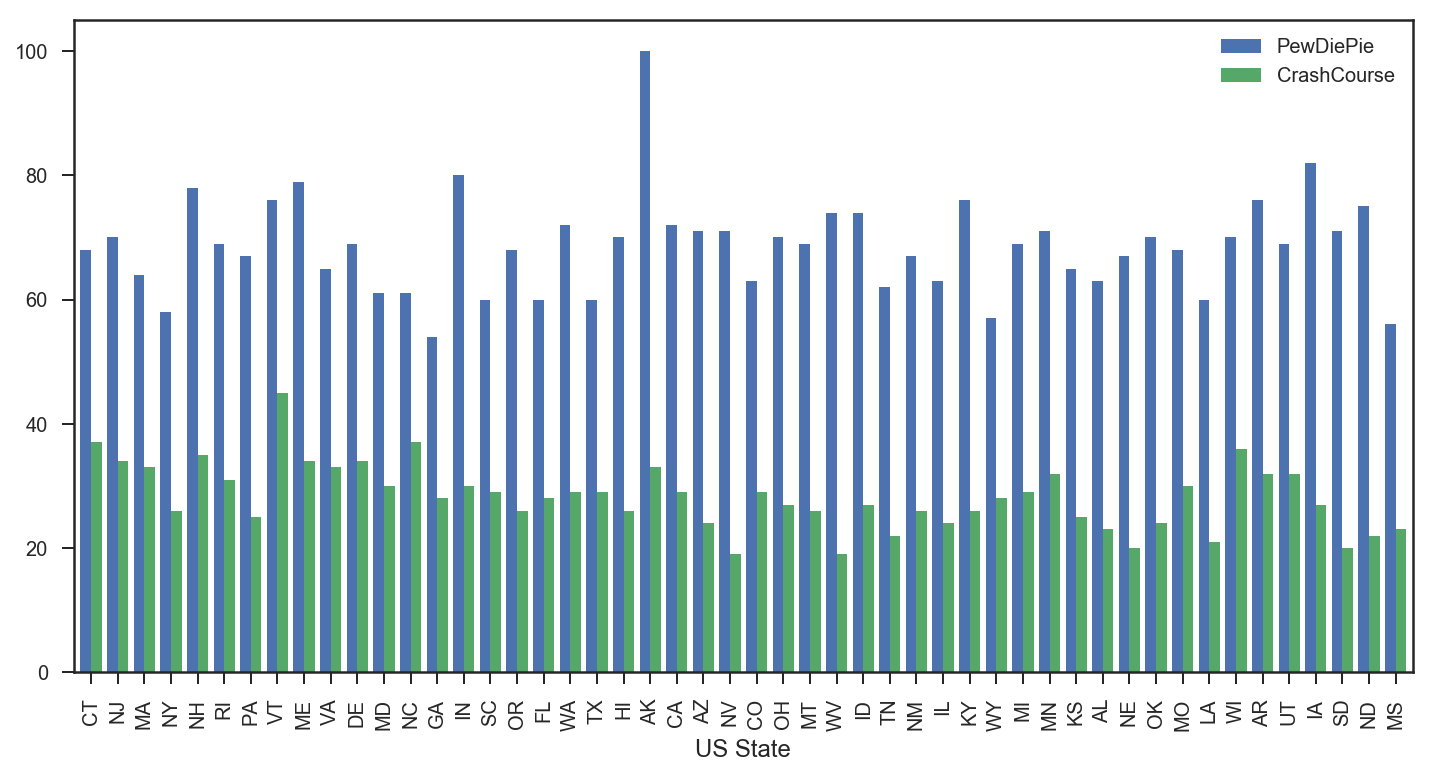

In [278]:
bar = sat_youtube[['PewDiePie', 'CrashCourse']].plot.bar(figsize = (12,6), width=.8)
bar.set_xlabel('US State', fontsize = 12)
bar.set_xticklabels(sat_youtube.State);
bar


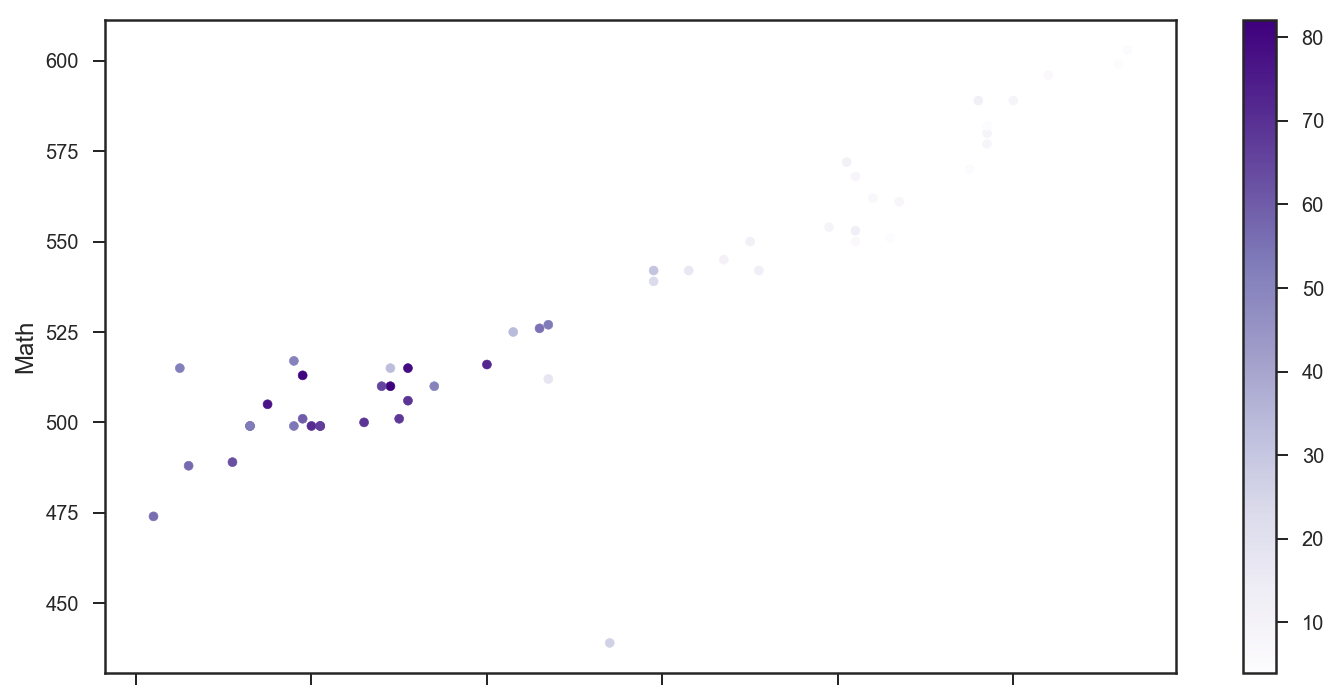

In [257]:
v = sat_youtube.plot.scatter('Verbal','Math',
                        c = sat_youtube.Rate,
                        colormap = plt.cm.Purples, figsize = (12,6))
v.set_xlabel('Verbal', fontsize = 12)
v.set_ylabel('Math', fontsize = 12)
# does not take an x label?


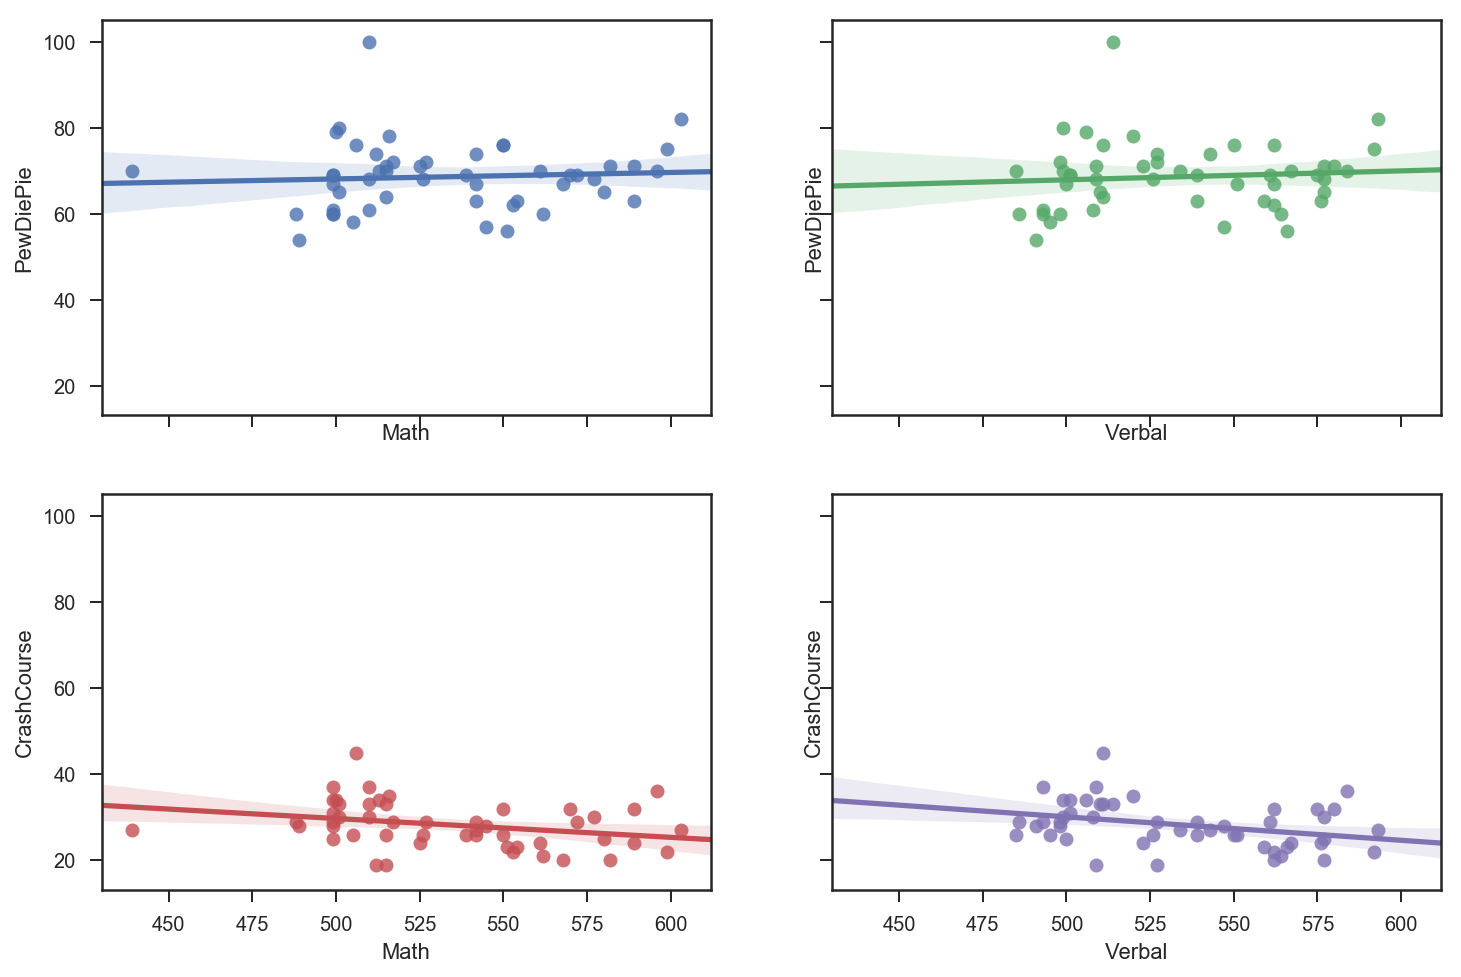

In [270]:
(fig, axes) = plt.subplots(2,2, sharey = True, sharex = True, figsize = (12,8))
sns.regplot(ax=axes[0,0], x='Math', y='PewDiePie', data=sat_youtube)
sns.regplot(ax=axes[0,1],x='Verbal', y='PewDiePie', data=sat_youtube)

sns.regplot(ax=axes[1,0], x='Math', y='CrashCourse', data=sat_youtube)
sns.regplot(ax=axes[1,1],x='Verbal', y='CrashCourse', data=sat_youtube)


#sydney['minimum_above_20'].plot(ax=axes[0], c='red', label="Sweltering days")
#sydney['maximum_below_20'].plot(ax=axes[1], c='blue', label="Freezing Days")

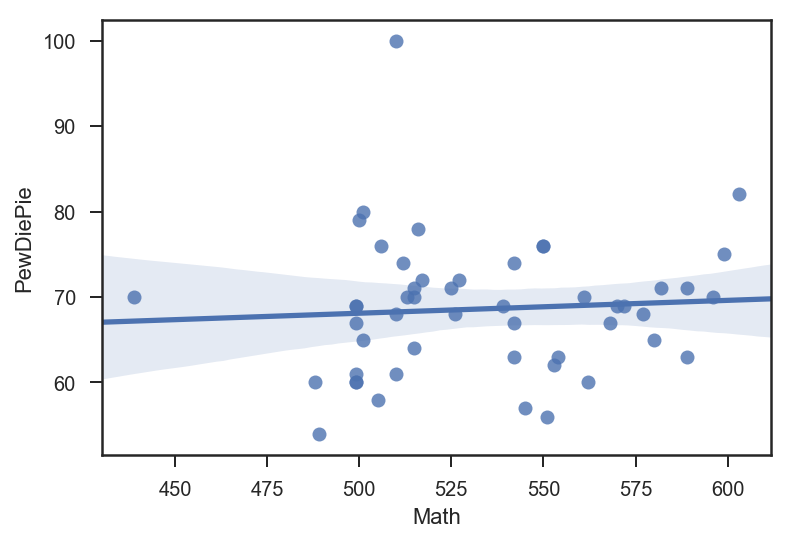

In [259]:
sns.regplot(x='Math', y='PewDiePie', data=sat_youtube)

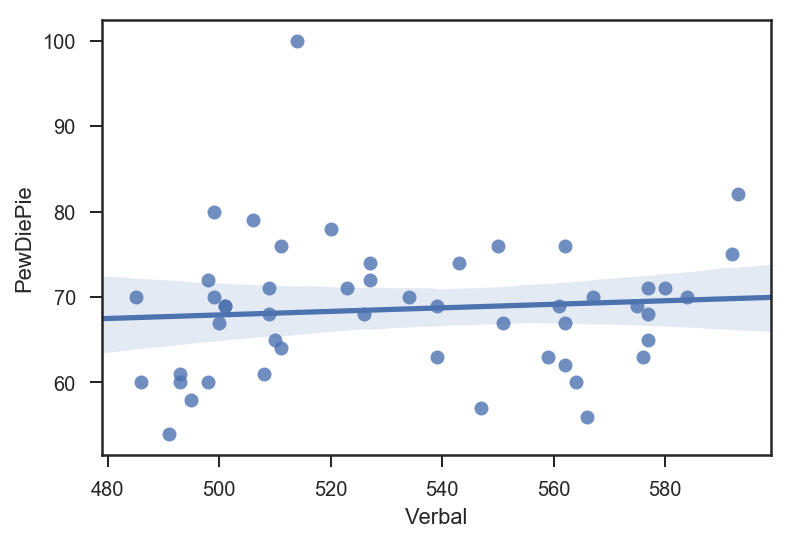

In [260]:
sns.regplot(x='Verbal', y='PewDiePie', data=sat_youtube)

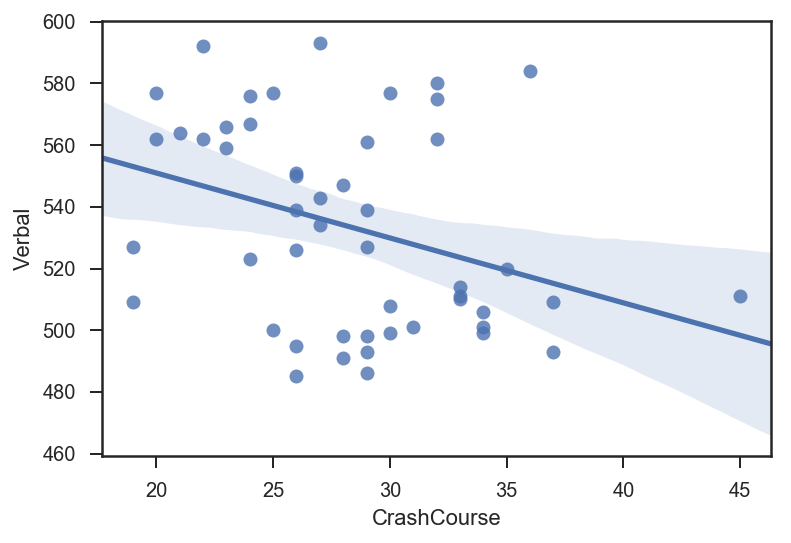

In [214]:
sns.regplot(x='CrashCourse', y='Verbal', data=sat_youtube)

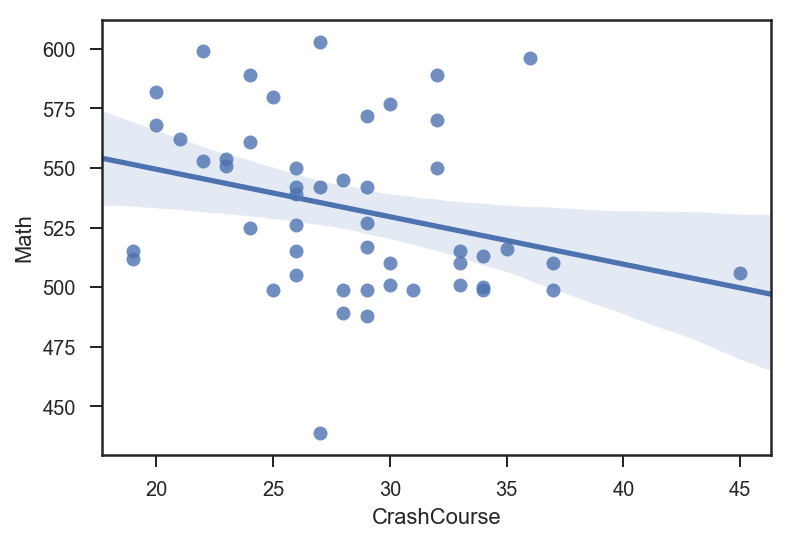

In [215]:
sns.regplot(x='CrashCourse', y='Math', data=sat_youtube)

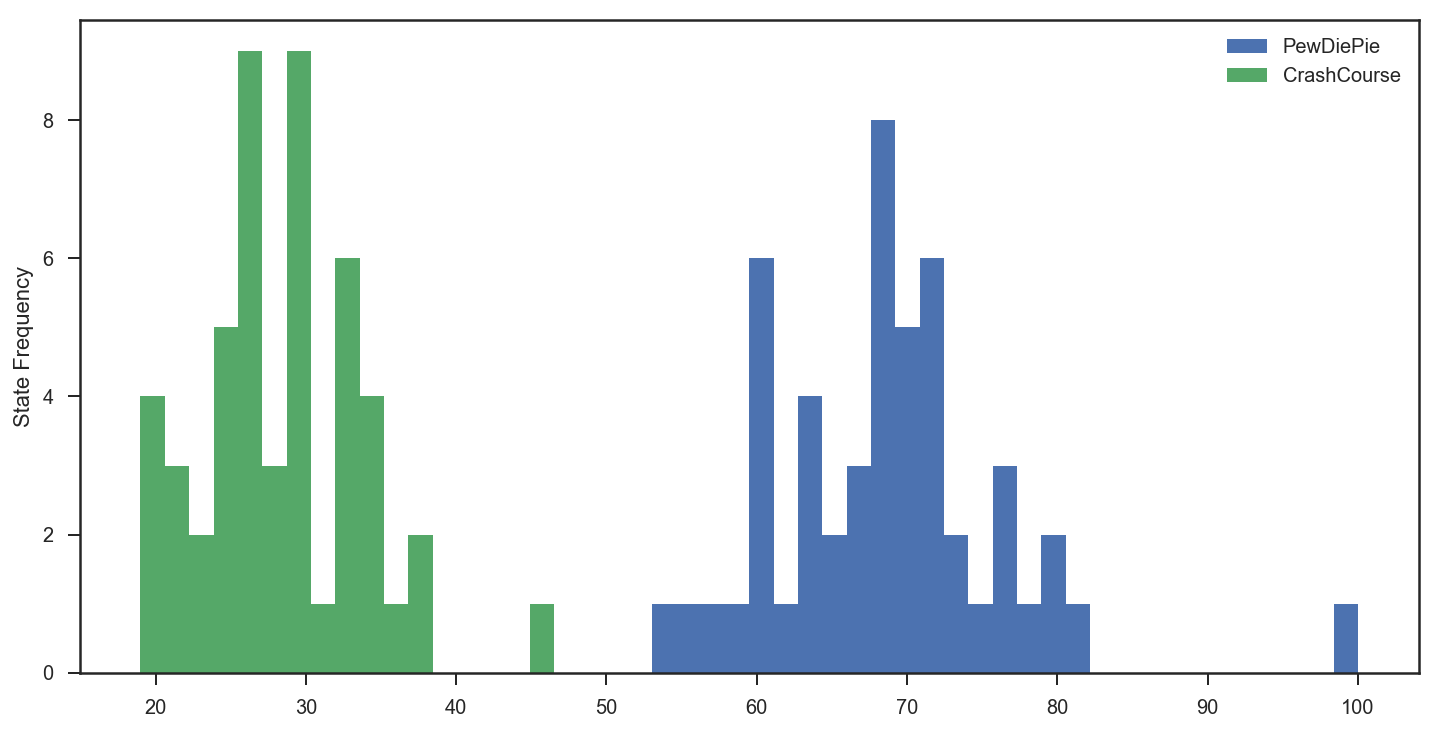

In [236]:
ax = sat_youtube[['PewDiePie', 'CrashCourse']].plot.hist(stacked=True, figsize = (12,6), bins = 50)
ax.set_ylabel('State Frequency')



##  Let's try guns

In [188]:
guns = pd.read_csv('firearms2015.csv')

In [187]:
guns

,STATE,RATE,DEATHS,URL
0,AL,19.6,958,/nchs/pressroom/states/alabama/alabama.htm
1,AK,23.4,177,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,13.8,970,/nchs/pressroom/states/arizona/arizona.htm
3,AR,16.9,520,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,7.7,"3,095",/nchs/pressroom/states/california/california.htm
5,CO,12.6,701,/nchs/pressroom/states/colorado/colorado.htm
6,CT,5.3,189,/nchs/pressroom/states/connecticut/connecticut...
7,DE,12.1,112,/nchs/pressroom/states/delaware/delaware.htm
8,FL,12.0,"2,559",/nchs/pressroom/states/florida/florida.htm
9,GA,14.1,"1,448",/nchs/pressroom/states/georgia/georgia.htm


In [177]:
gun_sat = pd.merge(sat_scores, guns, left_on="State", right_on="STATE")

In [204]:
gun_sat.DEATHS = gun_sat.DEATHS.str.replace(',','')
gun_sat.DEATHS = gun_sat.DEATHS.astype(int)

#df1['Avg_Annual'].str.replace(',', '')
#drugs[col].replace('%', '', inplace = True)

In [209]:
gun_sat[['DEATHS', 'Verbal','Math']].corr()

,DEATHS,Verbal,Math
DEATHS,1.000000,-0.267191,-0.255627
Verbal,-0.267191,1.000000,0.894788
Math,-0.255627,0.894788,1.000000


In [ ]:
# Slight negative correlations for both.

## Obesity, the failed attempt

In [121]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'
tables = pd.read_html(url, header = 0)

In [127]:
# crime = tables[tables['State','Violent Crime','Robbery','Burglary']]
obesity = tables[1]

In [128]:
drugs[col].replace('%', '', inplace = True)obesity

,State and District of Columbia,Obese adults,Overweight (incl. obese) adults,Obese children and adolescents,Obesity rank
0,Alabama,30.1%,65.4%,16.7%,3
1,Alaska,27.3%,64.5%,11.1%,14
2,Arizona,23.3%,59.5%,12.2%,40
3,Arkansas,28.1%,64.7%,16.4%,9
4,California,23.1%,59.4%,13.2%,41
5,Colorado,21.0%,55.0%,9.9%,51
6,Connecticut,20.8%,58.7%,12.3%,49
7,District of Columbia,22.1%,55.0%,14.8%,43
8,Delaware,25.9%,63.9%,22.8%,22
9,Florida,23.3%,60.8%,14.4%,39


In [130]:
usps_url = 'http://www.50states.com/abbreviations.htm'
tables = pd.read_html(usps_url, header = 0)
state_abbreviations = tables[0]
state_abbreviations.columns = ['State', 'Abbreviation']
state_abbreviations

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [135]:
sat_scores_A = pd.merge(sat_scores, state_abbreviations, left_on='State', right_on='Abbreviation')

In [137]:
sat_obesity = pd.merge(sat_scores_A, obesity, left_on='State_y', right_on='State and District of Columbia')



In [169]:
sat_obesity.head()

,State_x,Rate,Verbal,Math,Diff_Verbal_Math,Rates_Percentile,State_y,Abbreviation,State and District of Columbia,Obese adults,Overweight (incl. obese) adults,Obese children and adolescents,Obesity rank
0,CT,82,509,510,-1,100.000000,Connecticut,CT,Connecticut,20.8%,58.7%,12.3%,49
1,NJ,81,499,513,-14,98.039216,New Jersey,NJ,New Jersey,22.9%,60.5%,13.7%,42
2,MA,79,511,515,-4,96.078431,Massachusetts,MA,Massachusetts,20.9%,56.8%,13.6%,48
3,NY,77,495,505,-10,94.117647,New York,NY,New York,23.5%,60.0%,15.3%,37
4,NH,72,520,516,4,92.156863,New Hampshire,NH,New Hampshire,23.6%,60.8%,12.9%,35


In [163]:
sat_obesity.set_index('State_x')

,Rate,Verbal,Math,Diff_Verbal_Math,Rates_Percentile,State_y,Abbreviation,State and District of Columbia,Obese adults,Overweight (incl. obese) adults,Obese children and adolescents,Obesity rank
State_x,,,,,,,,,,,,
CT,82,509,510,-1,100.000000,Connecticut,CT,Connecticut,20.8%,58.7%,12.3%,49
NJ,81,499,513,-14,98.039216,New Jersey,NJ,New Jersey,22.9%,60.5%,13.7%,42
MA,79,511,515,-4,96.078431,Massachusetts,MA,Massachusetts,20.9%,56.8%,13.6%,48
NY,77,495,505,-10,94.117647,New York,NY,New York,23.5%,60.0%,15.3%,37
NH,72,520,516,4,92.156863,New Hampshire,NH,New Hampshire,23.6%,60.8%,12.9%,35
RI,71,501,499,2,89.215686,Rhode Island,RI,Rhode Island,21.4%,60.4%,11.9%,46
PA,71,500,499,1,89.215686,Pennsylvania,PA,Pennsylvania,25.7%,61.9%,13.3%,24
VT,69,511,506,5,85.294118,Vermont,VT,Vermont,21.1%,56.9%,11.3%,47
ME,69,506,500,6,85.294118,Maine,ME,Maine,23.7%,60.8%,12.7%,34


In [171]:
for col in sat_obesity.iloc[:,-4:-1]:
    ''' replaces '%' with "" value, convert to float type'''
    drugs[col].replace('%', '', inplace = True)
    drugs[col] = drugs[col].astype(float)
    
# I should ask someone about this error.

KeyError: u'Obese adults'

In [158]:

sat_obesity['Obese adults']

#my_df.loc[[ "row idxs" ], ["col idxs"]]

0     20.8%
1     22.9%
2     20.9%
3     23.5%
4     23.6%
5     21.4%
6     25.7%
7     21.1%
8     23.7%
9     25.2%
10    25.9%
11    25.2%
12    27.1%
13    27.5%
14    27.5%
15    29.2%
16    22.1%
17    25.0%
18    23.3%
19    24.5%
20    27.2%
21    20.7%
22    27.3%
23    23.1%
24    23.3%
25    23.6%
26    21.0%
27    26.9%
28    21.7%
29    30.6%
30    24.6%
31    29.0%
32    23.3%
33    25.3%
34    28.4%
35    24.0%
36    27.7%
37    24.8%
38    25.8%
39    30.1%
40    26.5%
41    28.1%
42    27.4%
43    29.5%
44    25.5%
45    28.1%
46    21.8%
47    26.3%
48    26.1%
49    25.9%
50    34.4%
Name: Obese adults, dtype: object